In [1]:
%load_ext autoreload
%autoreload 2

from datasets import DataCifar10
from models import LinearSVM
from optimers import OptimerSGD
from tuners import ParamTuner
from utils import check_accuracy, show_weight_images, show_training_info

import numpy as np

In [3]:
# load data
dataloader = DataCifar10('./datasets/cifar-10-batches-py', norm_dis_mean=True,
                         num_val=10000, num_train=40000, num_test=1000)
    
print('Training data shape: ', dataloader.x_train.shape)
print('Training labels shape: ', dataloader.y_train.shape)
print('Validating data shape: ', dataloader.x_val.shape)
print('Validating labels shape: ', dataloader.y_val.shape)
print('Testing data shape: ', dataloader.x_test.shape)
print('Testing labels shape: ', dataloader.y_test.shape)

Training data shape:  (40000, 32, 32, 3)
Training labels shape:  (40000,)
Validating data shape:  (10000, 32, 32, 3)
Validating labels shape:  (10000,)
Testing data shape:  (1000, 32, 32, 3)
Testing labels shape:  (1000,)


In [3]:
# sanity check
model = LinearSVM(32 * 32 * 3, 10, hyperparams={'reg': 0.0})
loss, dparam = model.backward(dataloader.x_train, dataloader.y_train)

print('Init loss is', loss)

Init loss is 8.933788819174955


In [4]:
# train model
model = LinearSVM(32 * 32 * 3, 10, hyperparams={'reg': 10})
optimer = OptimerSGD(hyperparams={'learn_rate': 1e-9, 'num_iters': 1000, 'batch_size': 500})

optimer.train(model, dataloader)

0 / 1000 loss is 8.955255953973781
100 / 1000 loss is 4.848588115625457
200 / 1000 loss is 4.771601190561751
300 / 1000 loss is 4.588878513954552
400 / 1000 loss is 4.338145340663668
500 / 1000 loss is 3.8615459754210293
600 / 1000 loss is 4.193860678089693
700 / 1000 loss is 3.957159683634557
800 / 1000 loss is 4.338073203808543
900 / 1000 loss is 4.368865837001752


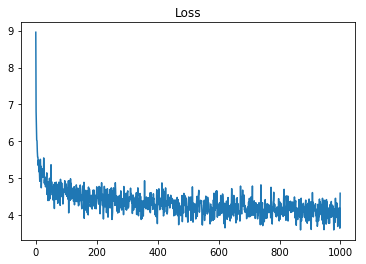

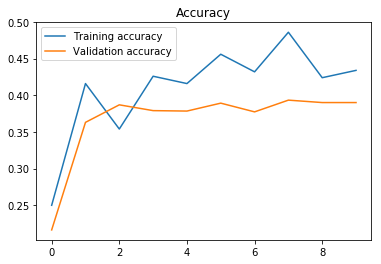

In [13]:
# plot loss curve
show_training_info(optimer)

In [5]:
# check accuracy
scores = model.predict(dataloader.x_test)
accuracy = check_accuracy(scores, dataloader.y_test)
    
print('The accuracy on testing dataset is ', accuracy)

The accuracy on testing dataset is  0.384


In [14]:
def get_model(hyperparams):
    return LinearSVM(32 * 32 * 3, 10, hyperparams=hyperparams)

# tune hyperparameters
tuner = ParamTuner(get_model, OptimerSGD, dataloader)
model_best, param_best, acc_best = tuner.tune({'reg': 0.01, 'learn_rate': 1e-8, 'num_iters': 500, 'batch_size': 500}, 
                                              {'reg': [1, 10, 100, 1000, 10000], 
                                               'learn_rate': [1e-10, 5e-10, 1e-9, 5e-9, 1e-8, 5e-8],
                                               'num_iters': [500, 1000, 1500, 2000, 2500, 3000]}, epoch=3)

Tune reg in [1, 10, 100, 1000, 10000]
With {'reg': 1, 'learn_rate': 1e-08, 'num_iters': 500, 'batch_size': 500} accuracy: 0.2944  - Best!
With {'reg': 10, 'learn_rate': 1e-08, 'num_iters': 500, 'batch_size': 500} accuracy: 0.2792
With {'reg': 100, 'learn_rate': 1e-08, 'num_iters': 500, 'batch_size': 500} accuracy: 0.2727
With {'reg': 1000, 'learn_rate': 1e-08, 'num_iters': 500, 'batch_size': 500} accuracy: 0.3062  - Best!
With {'reg': 10000, 'learn_rate': 1e-08, 'num_iters': 500, 'batch_size': 500} accuracy: 0.2892
Tune learn_rate in [1e-10, 5e-10, 1e-09, 5e-09, 1e-08, 5e-08]
With {'reg': 1000, 'learn_rate': 1e-10, 'num_iters': 500, 'batch_size': 500} accuracy: 0.3699  - Best!
With {'reg': 1000, 'learn_rate': 5e-10, 'num_iters': 500, 'batch_size': 500} accuracy: 0.3904  - Best!
With {'reg': 1000, 'learn_rate': 1e-09, 'num_iters': 500, 'batch_size': 500} accuracy: 0.377
With {'reg': 1000, 'learn_rate': 5e-09, 'num_iters': 500, 'batch_size': 500} accuracy: 0.3177
With {'reg': 1000, 'lear

In [15]:
# check accuracy
scores = model_best.predict(dataloader.x_test)
accuracy = check_accuracy(scores, dataloader.y_test)
    
print('The best hyperparameter is ', param_best)
print('The best accuracy on validating dataset is ', acc_best)
print('The accuracy on testing dataset is ', accuracy)

The best hyperparameter is  {'reg': 1, 'learn_rate': 5e-10, 'num_iters': 3000, 'batch_size': 500}
The best accuracy on validating dataset is  0.3992
The accuracy on testing dataset is  0.37


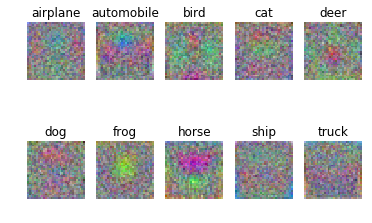

In [16]:
# show weight image
show_weight_images(model_best.params['W'], 32, dataloader.label_names)